# Chemistry inspired anzatz


## Source of the circuit



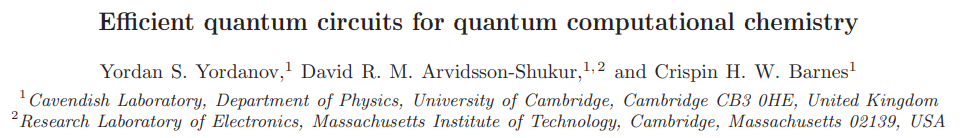


## Single excitation module

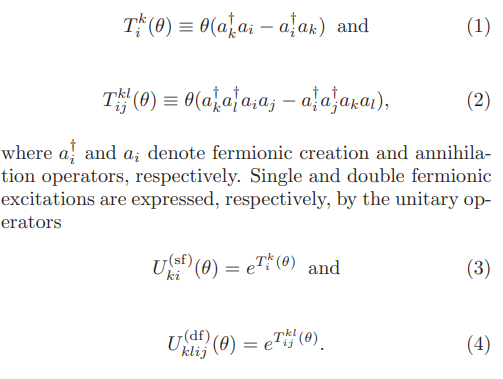

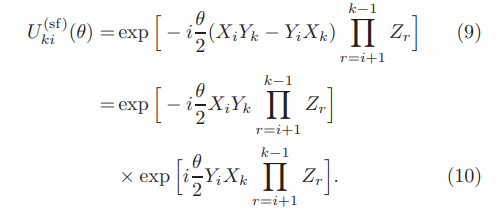
   
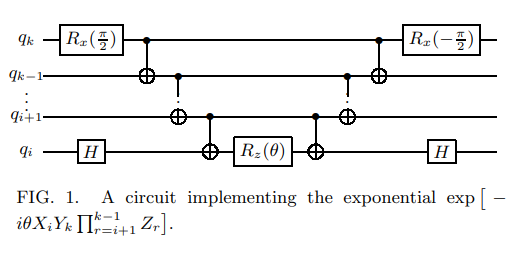

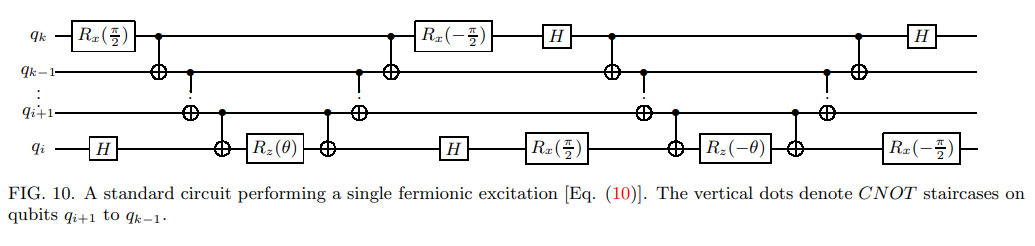

### Comments

1. The circuit produce transitions from i to k and from k to i. The function assumes that i < k

In [37]:
import qiskit
from qiskit import QuantumRegister as Q_R
from qiskit import ClassicalRegister as C_R

import numpy as np

In [33]:
PI = np.pi

In [71]:
def u_se_1(theta, i, k, qc):
    '''
    The function realizes the circuit shown in Fig. 1 above
    
    Here we assume that i < k. 
    However, transitions goes both ways.
    '''
    PI = np.pi
    gate = qiskit.circuit.library.RXGate(PI / 2)
    qc.append(gate, [k])
    qc.h(i)
    for i_qubit in range(k, i, -1):
        qc.cx(i_qubit, i_qubit - 1)
    gate = qiskit.circuit.library.RZGate(theta)
    qc.append(gate, [i])
    for i_qubit in range(i, k):
        qc.cx(i_qubit + 1, i_qubit)
    qc.h(i)
    gate = qiskit.circuit.library.RXGate(- PI / 2)
    qc.append(gate, [k])
    return qc

def u_se_2(theta, i, k, qc):
    '''
    The function realizes the circuit for the single exciattion term conjugated to the one above
    
    Here we assume that i < k for
    '''
    PI = np.pi
    gate = qiskit.circuit.library.RXGate(PI / 2)
    qc.append(gate, [i])
    qc.h(k)
    for i_qubit in range(k, i, -1):
        qc.cx(i_qubit, i_qubit - 1)
    gate = qiskit.circuit.library.RZGate(-theta)
    qc.append(gate, [i])
    for i_qubit in range(i, k):
        qc.cx(i_qubit + 1, i_qubit)
    qc.h(k)
    gate = qiskit.circuit.library.RXGate(- PI / 2)
    qc.append(gate, [i])
    return qc

def u_se(theta, i, k, qc):
    qc = u_se_1(theta, i, k, qc)
    qc = u_se_2(theta, i, k, qc)
    return qc

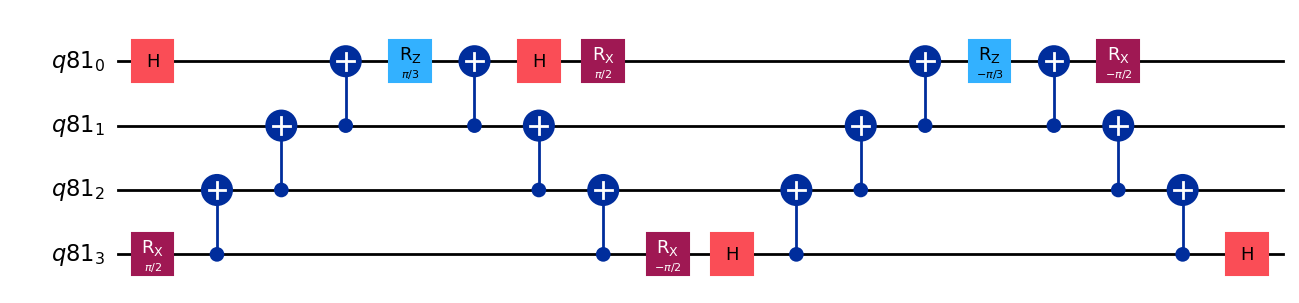

In [64]:
n_nodes = 1
n_qubits = n_nodes * 4

q_reg = Q_R(n_qubits)
qc = qiskit.QuantumCircuit(q_reg)

qc = u_se(PI/3, 0, 3, qc)



qc.draw('mpl')

## Testing the circuit

1. create a state with a single excitation at qubit 0. (X gate at the beginning)
2. Circuit should conserve number of particles. So, it should produce only single exitation states.
3. The circuit couple qubit 0 and qubit 3. So, there should be transitions between state 0 and 3.


### Results.
1. When we remove X gate and have a state with no excitation, we end up with the state without aby exciattion.
2. If we have state 0 excited, when we see that only transitions between state 0 and state 3.
3. If theta is pi/2, then full transition happens. state 0 transforms into state 3.
4. If theta is pi/4. We get superposition of 0 and 3 states with equal probabilities.
5. If state 1 or 2 is excited, then the circuit does nothing to this state.
6. State with 2 excited states keep number of excited states after the cirtion application.
7. Domain for theta is 0<theta<pi/2.

So, the circuit conserves number of "electrons". 

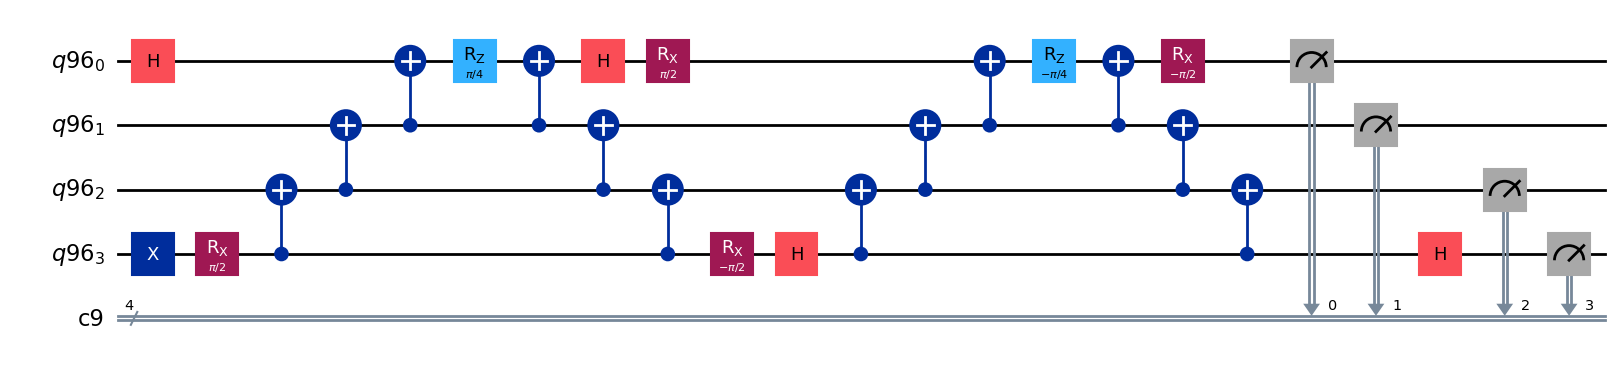

In [69]:
n_nodes = 1
n_qubits = n_nodes * 4

q_reg = Q_R(n_qubits)
c_reg = C_R(n_qubits)
qc = qiskit.QuantumCircuit(q_reg,c_reg)

qc.x(3)


qc = u_se(PI/4, 0, 3, qc)
for i in range(n_qubits):
    qc.measure(i,i)



qc.draw('mpl')

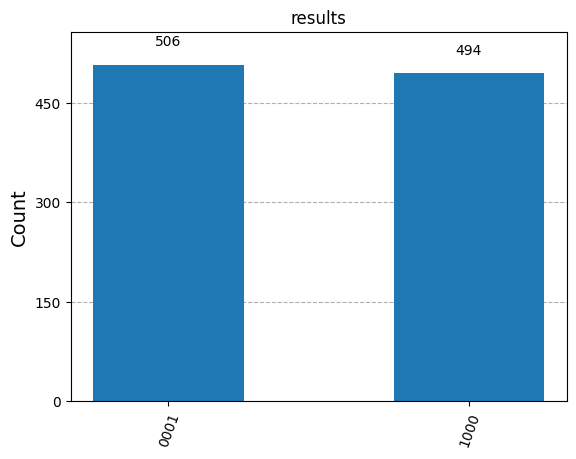

In [70]:
from qiskit_aer import Aer
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

simulator = AerSimulator()
qc_tr = transpile(qc, simulator)
result = simulator.run(qc_tr,shots = 1000).result()
counts= result.get_counts(qc_tr)


plot_histogram(counts, title = 'results')

## Double exciatations

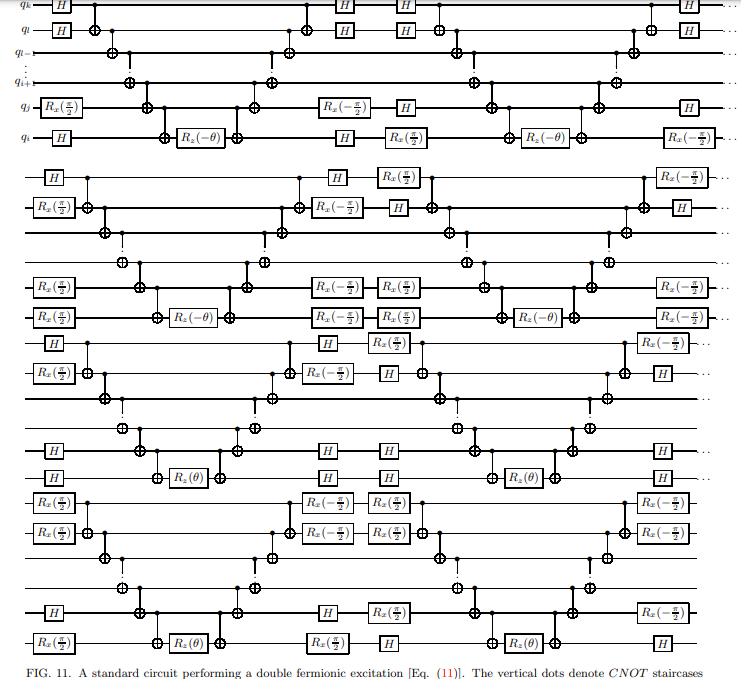


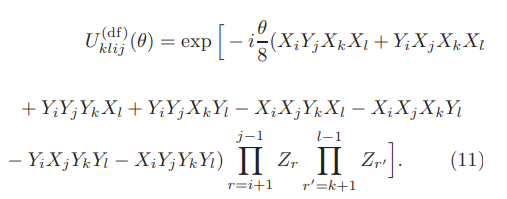

### Notes
Shown above circuit does not look very clear and does not correspond to equation above. 

The figure below from other paper (arXiv:1805.04340v1) looks more correct.

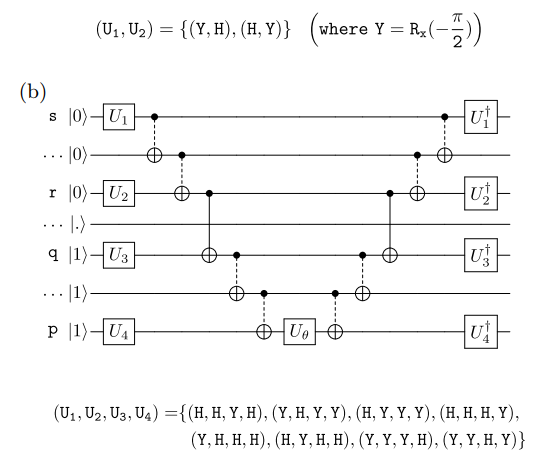

### Results

1. Domain for thea is 0<theta<pi/4.

In [188]:
def staircase(theta, i, j, k, l, qc):
    '''
    i<j<k<l
    '''
    PI = np.pi
    for i_q in range(l,k,-1):
        qc.cx(i_q, i_q - 1)
    qc.cx(k, j)
    for i_q in range(j,i,-1):
        qc.cx(i_q, i_q - 1)
    gate = qiskit.circuit.library.RZGate(- theta)
    qc.append(gate, [i])
    for i_q in range(i,j):
        qc.cx(i_q + 1, i_q)
    qc.cx(k, j)    
    for i_q in range(k,l):
        qc.cx(i_q + 1, i_q)
    return qc

def u_de(theta, i, j, k, l, qc):
    '''
    i<j, k<l
    '''
    PI = np.pi
    if j < k:
        i_st = i
        j_st = j
        k_st = k
        l_st = l

    if j > k and j < l:
        i_st = i
        j_st = k
        k_st = j
        l_st = l

    if j > k and j > l:
        i_st = i
        j_st = k
        k_st = l
        l_st = j
    
    #1
    qc.h(k)
    qc.h(l)
    qc.h(i)
    gate = qiskit.circuit.library.RXGate(PI / 2)
    qc.append(gate, [j])
    qc = staircase(theta, i_st, j_st, k_st, l_st, qc)
    qc.h(k)
    qc.h(l)
    qc.h(i)
    gate = qiskit.circuit.library.RXGate(- PI / 2)
    qc.append(gate, [j])

    #2
    qc.h(k)
    qc.h(l)
    qc.h(j)
    gate = qiskit.circuit.library.RXGate(PI / 2)
    qc.append(gate, [i])
    qc = staircase(theta, i_st, j_st, k_st, l_st, qc)
    qc.h(k)
    qc.h(l)
    qc.h(j)
    gate = qiskit.circuit.library.RXGate(- PI / 2)
    qc.append(gate, [i])

    #3
    qc.h(l)
    gate = qiskit.circuit.library.RXGate(PI / 2)
    qc.append(gate, [k])
    #gate = qiskit.circuit.library.RXGate(PI / 2)
    qc.append(gate, [i])
    #gate = qiskit.circuit.library.RXGate(PI / 2)
    qc.append(gate, [j])
    qc = staircase(theta, i_st, j_st, k_st, l_st, qc)
    qc.h(l)
    gate = qiskit.circuit.library.RXGate( - PI / 2)
    qc.append(gate, [k])
    #gate = qiskit.circuit.library.RXGate(PI / 2)
    qc.append(gate, [i])
    #gate = qiskit.circuit.library.RXGate(PI / 2)
    qc.append(gate, [j])

    #4
    qc.h(k)
    gate = qiskit.circuit.library.RXGate(PI / 2)
    qc.append(gate, [l])
    #gate = qiskit.circuit.library.RXGate(PI / 2)
    qc.append(gate, [i])
    #gate = qiskit.circuit.library.RXGate(PI / 2)
    qc.append(gate, [j])
    qc = staircase(theta, i_st, j_st, k_st, l_st, qc)
    qc.h(k)
    gate = qiskit.circuit.library.RXGate( - PI / 2)
    qc.append(gate, [l])
    #gate = qiskit.circuit.library.RXGate(PI / 2)
    qc.append(gate, [i])
    #gate = qiskit.circuit.library.RXGate(PI / 2)
    qc.append(gate, [j])
    
    #5
    qc.h(l)
    gate = qiskit.circuit.library.RXGate(PI / 2)
    qc.append(gate, [k])
    qc.h(i)
    qc.h(j)
    qc = staircase(-theta, i_st, j_st, k_st, l_st, qc)
    qc.h(l)
    gate = qiskit.circuit.library.RXGate(-PI / 2)
    qc.append(gate, [k])
    qc.h(i)
    qc.h(j)

    #6
    qc.h(k)
    gate = qiskit.circuit.library.RXGate(PI / 2)
    qc.append(gate, [l])
    qc.h(i)
    qc.h(j)
    qc = staircase(-theta, i_st, j_st, k_st, l_st, qc)
    qc.h(k)
    gate = qiskit.circuit.library.RXGate(-PI / 2)
    qc.append(gate, [l])
    qc.h(i)
    qc.h(j)


    
    #7
    gate = qiskit.circuit.library.RXGate(PI / 2)
    qc.append(gate, [l])
    qc.append(gate, [k])
    qc.h(j)
    qc.append(gate, [i])
    qc = staircase(-theta, i_st, j_st, k_st, l_st, qc)
    gate = qiskit.circuit.library.RXGate(-PI / 2)
    qc.append(gate, [l])
    qc.append(gate, [k])
    qc.h(j)
    qc.append(gate, [i])

    #8
    gate = qiskit.circuit.library.RXGate(PI / 2)
    qc.append(gate, [l])
    qc.append(gate, [k])
    qc.h(i)
    qc.append(gate, [j])
    qc = staircase(-theta, i_st, j_st, k_st, l_st, qc)
    gate = qiskit.circuit.library.RXGate(-PI / 2)
    qc.append(gate, [l])
    qc.append(gate, [k])
    qc.h(i)
    qc.append(gate, [j])
    
    return qc


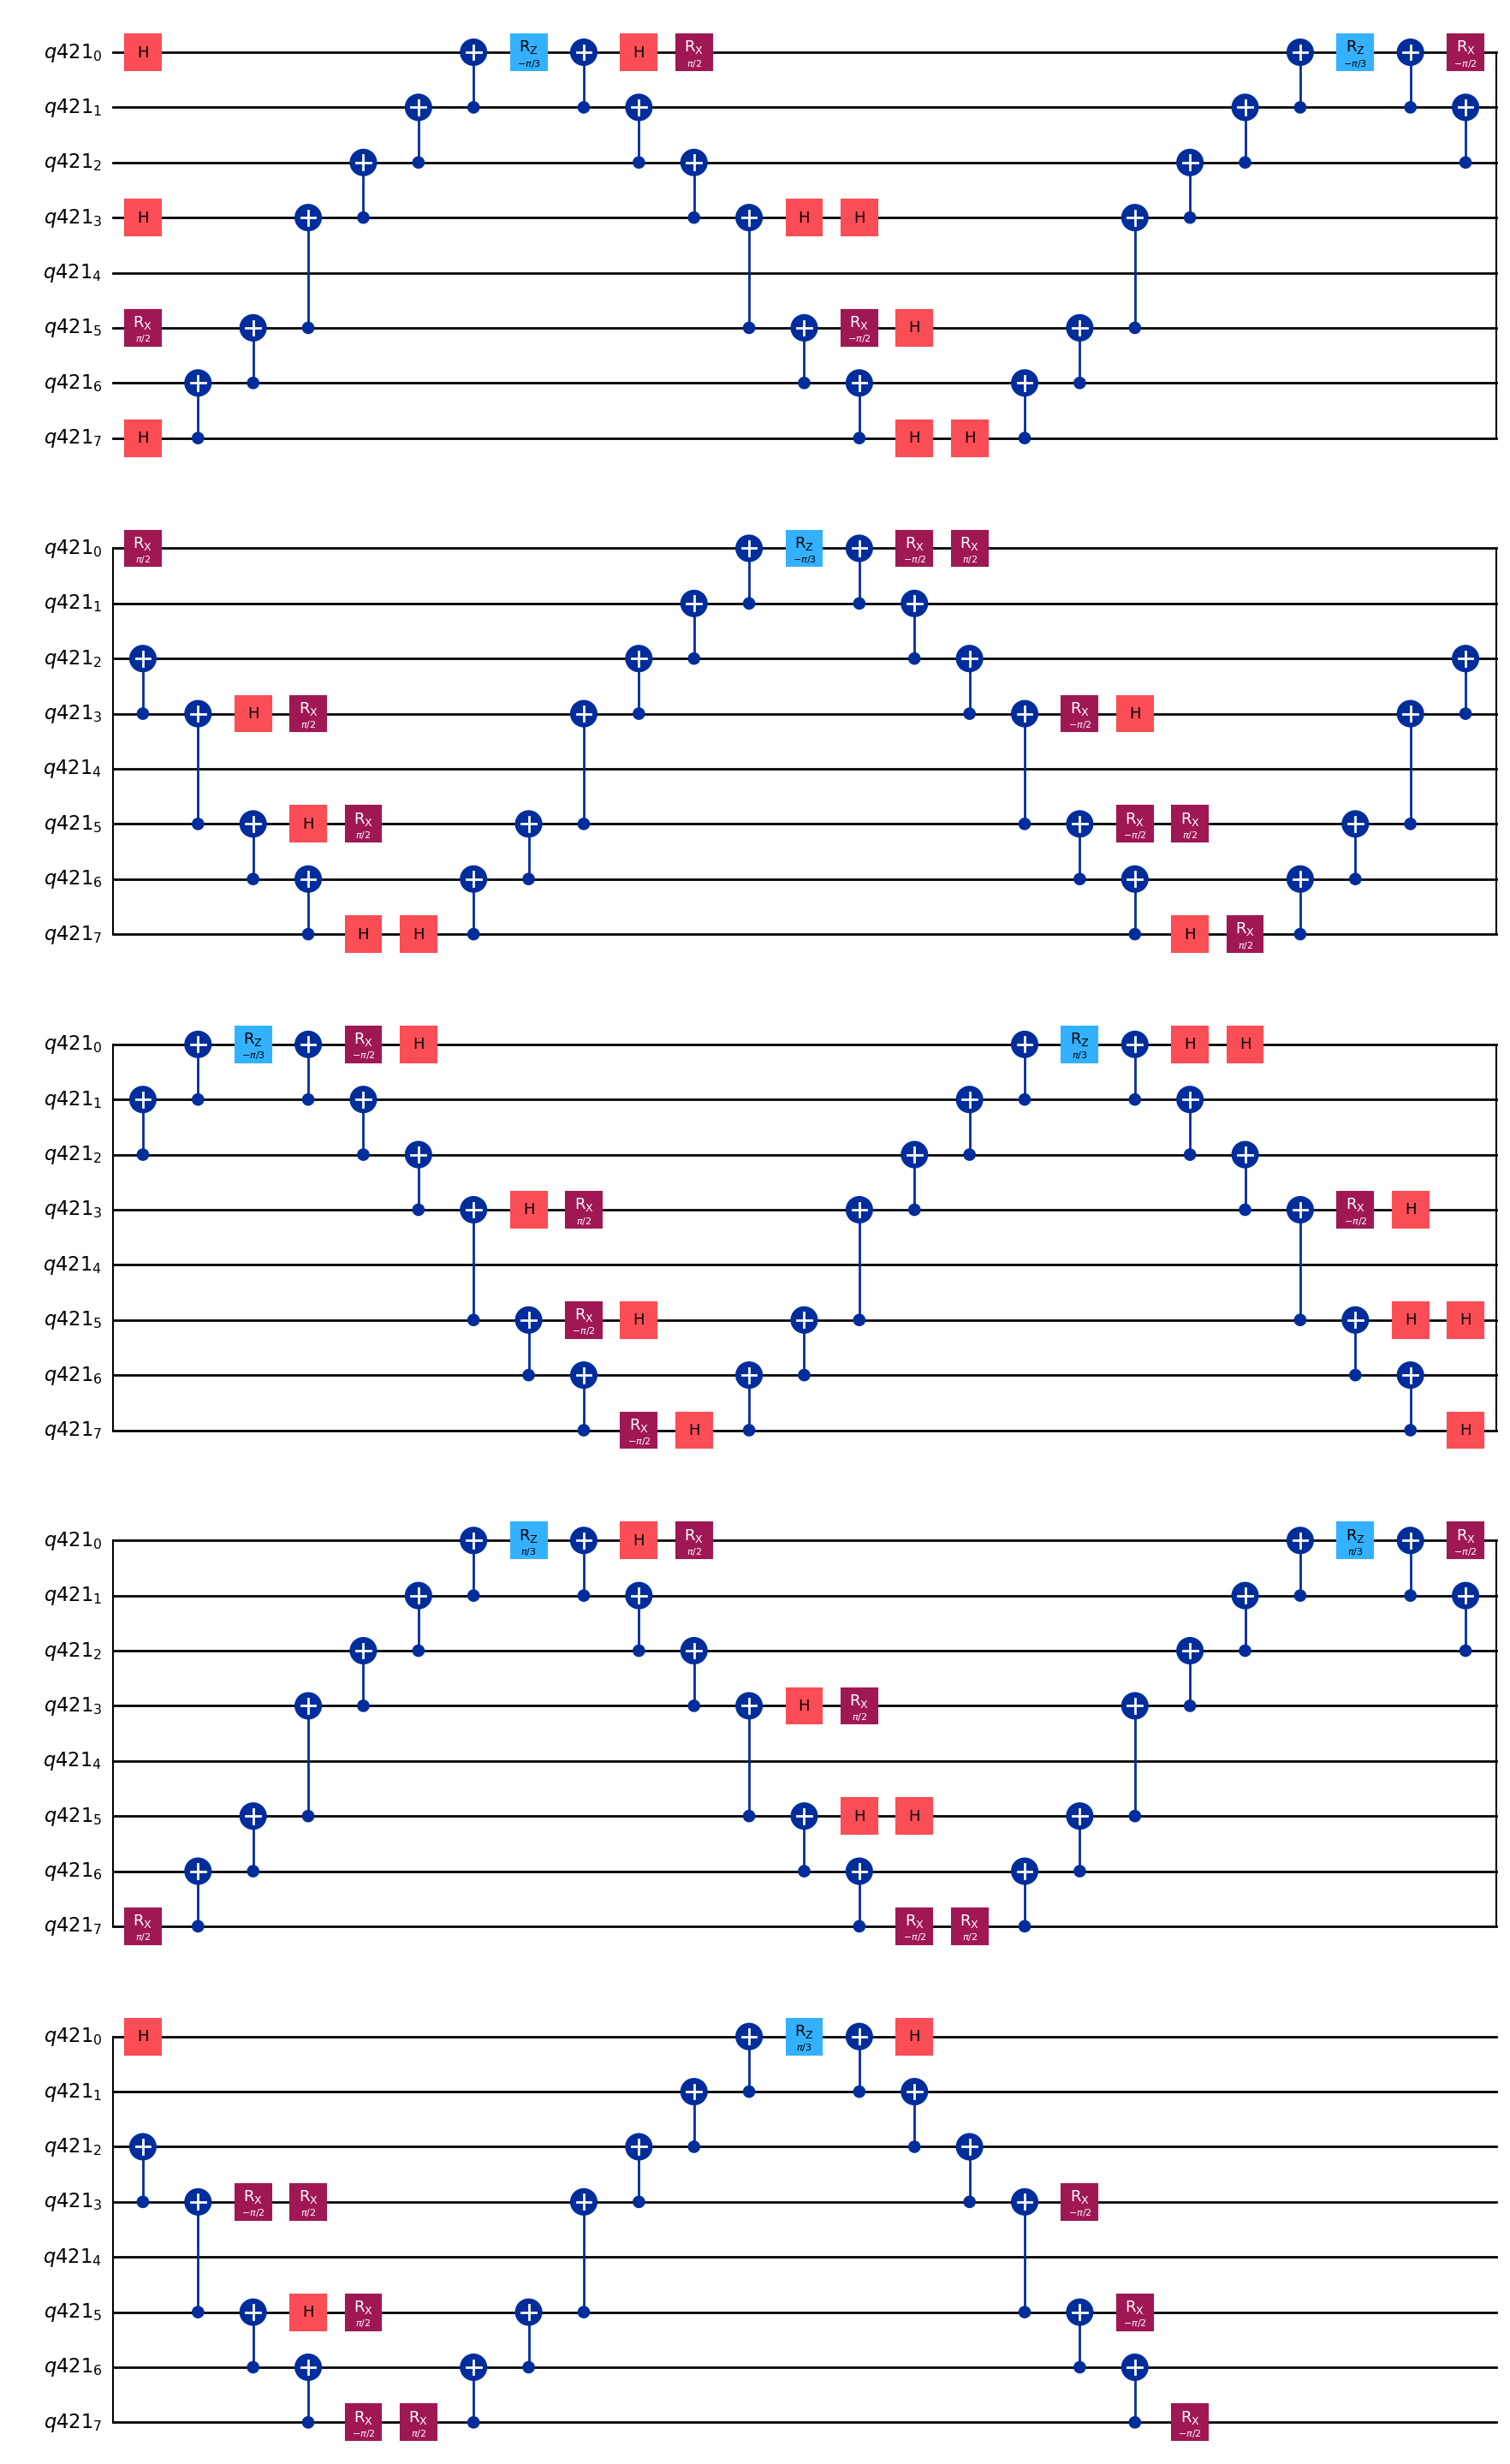

In [190]:
n_nodes = 1
n_qubits = n_nodes * 8

q_reg = Q_R(n_qubits)
qc = qiskit.QuantumCircuit(q_reg)

qc = u_de(PI/3, 0, 5, 3, 7, qc)

qc.draw('mpl')

In [226]:
n_nodes = 1
n_qubits = n_nodes * 8

q_reg = Q_R(n_qubits)
c_reg = C_R(n_qubits)
qc = qiskit.QuantumCircuit(q_reg,c_reg)

qc.x(0)
qc.x(7)


qc = u_de(PI/4, 0, 7, 3, 5, qc)
for i in range(n_qubits):
    qc.measure(i,i)

#qc.draw('mpl')

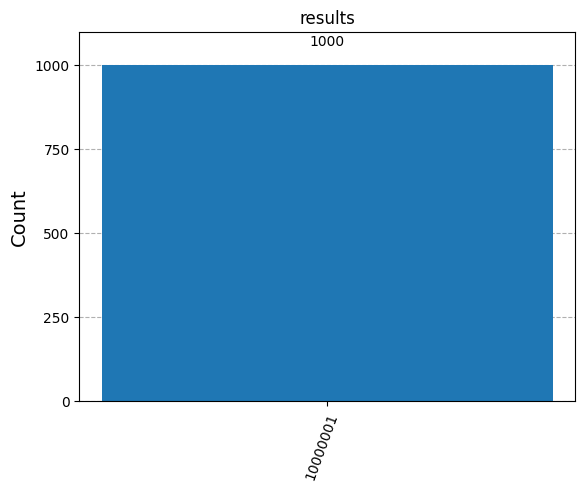

In [227]:
simulator = AerSimulator()
qc_tr = transpile(qc, simulator)
result = simulator.run(qc_tr,shots = 1000).result()
counts= result.get_counts(qc_tr)


plot_histogram(counts, title = 'results')

## Full excitation opertor

In [204]:
def exc(n_qubits, theta, qc):
    '''
    The function creates an operator that perform single-particle and double-particles transitions on an initial state.
    Initial state should be defined outside of the function.
    The function is independent of the initial state.

    Parameters:
    n_qubits - number of qubits in the cirquit qc. Should be more than 4. Corresponds to the number of states in the system.
    theta - array of angles theta 
    
    '''
    n = 0
    for i in range(n_qubits):
        for j in range(i + 1, n_qubits):
            qc = u_se(theta[n], i, j, qc)
            n = n + 1
    
    for i in range(n_qubits):
        for j in range(i + 1, n_qubits):
            for k in range(i + 1, n_qubits):
                for l in range(k + 1, n_qubits):
                    if k != j and l !=j:
                        qc = u_de(theta[n], i, j, k, l, qc)
                        n = n + 1
    return qc
    
            
        

In [224]:
n_qubits = 8

len_se = n_qubits * (n_qubits - 1) / 2
len_de = n_qubits * (n_qubits - 1) * (n_qubits - 2) * (n_qubits - 3) / 4 / 2
len_tot = int(len_se + len_de)

print(len_se)
print(len_de)

theta = [0]
for i in range(len_tot):
    theta.append(0)

theta[8] = PI / 9

q_reg = Q_R(n_qubits)
c_reg = C_R(n_qubits)
qc = qiskit.QuantumCircuit(q_reg,c_reg)

qc.x(1)
qc.x(2)


qc = exc(n_qubits, theta, qc)

for i in range(n_qubits):
    qc.measure(i,i)

#qc.draw('mpl')

28.0
210.0


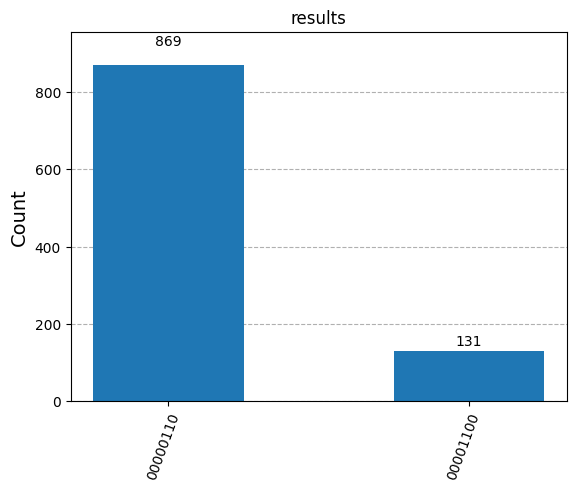

In [225]:
simulator = AerSimulator()
qc_tr = transpile(qc, simulator)
result = simulator.run(qc_tr,shots = 1000).result()
counts= result.get_counts(qc_tr)


plot_histogram(counts, title = 'results')